https://www.kaggle.com/code/henriqueyamahata/bank-marketing-classification-roc-f1-recall

https://www.kaggle.com/code/gowthamchowdry/bank-classifying-term-deposit-subscriptions/notebook - c

https://www.bdxconsult.com/demo/Bank_marketing_demo.pdf

Narrative artikler
https://kristinelpetrosyan.medium.com/handling-missing-data-for-bank-marketing-dataset-8098385d489c

https://towardsdatascience.com/machine-learning-case-study-a-data-driven-approach-to-predict-the-success-of-bank-telemarketing-20e37d46c31c?fbclid=IwAR1pu0A841HXvBi5BZfNqld7R4TZo0jtXNpq8jicpOJvhJXT4jX4nS-ukFk

Questions
- Iterations reached limit ????? search for this we get an error might need help for that?
- Which Scaler should we use? MinMax Scaler or Standard Scaler
- How do we fix the numpy standardscaler issue?


- How do we run SML on nominal data, with no natural order?
- How do we treat unknown do we simply drop them? We have split our data into different sets

To-do
Choose relevant parameters aka we need to drop some
Sort the data and prepare it for the SML


In [ ]:
!pip install xgboost -U -q
!pip install sklearn -U -q

In [ ]:
#Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

#For SML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import itertools
from sklearn.metrics import classification_report

In [ ]:
# !pip install umap-learn -q

In [ ]:
#Importing our data hosted on GitHub
data_raw = pd.read_csv("https://raw.githubusercontent.com/Ceges98/BDS-Project/main/bank_marketing.csv", sep=";")

Firstly we drop all data containing unknown, we discussed different options in the group and decided to it this way.

There is unknown (missing values) in all Bank Client features except age.

After looking at different plots we see the category "default" has either the options no or unknown and very few oberservations with yes, therefore we drop that column before dropping the missing values. 

In [ ]:
#dropping default
data_raw = data_raw.drop(columns = "default")

In [ ]:
data_raw.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [ ]:
data_raw = data_raw[data_raw["job"].str.contains("unknown") == False] # 330 cotaining unknown

In [ ]:
data_raw.marital.value_counts()

married     24694
single      11494
divorced     4599
unknown        71
Name: marital, dtype: int64

In [ ]:
data_raw = data_raw[data_raw["marital"].str.contains("unknown") == False] #71 values containing unknown

In [ ]:
data_raw.education.value_counts()

university.degree      12096
high.school             9464
basic.9y                6006
professional.course     5225
basic.4y                4118
basic.6y                2264
unknown                 1596
illiterate                18
Name: education, dtype: int64

In [ ]:
data_raw = data_raw[data_raw["education"].str.contains("unknown") == False] # 1600 containing unknown

In [ ]:
data_raw.housing.value_counts() 

yes        20578
no         17667
unknown      946
Name: housing, dtype: int64

In [ ]:
data_raw = data_raw[data_raw["housing"].str.contains("unknown") == False] # 947 containing unknown

In [ ]:
data_raw.loan.value_counts()

no     32286
yes     5959
Name: loan, dtype: int64

In [ ]:
data_raw = data_raw[data_raw["loan"].str.contains("unknown") == False] # 0 containing unknown after running the above

In [ ]:
data_raw.shape
38245/41188

0.9285471496552394

We threw away roughly around 7.1% of the obersvations by doing this, another option would have been to impute it though.

In [ ]:
data_raw.y.value_counts()

no     33987
yes     4258
Name: y, dtype: int64

In [ ]:
#Splitting the dataset according to the output variable (y)
data_majority = data_raw[data_raw.y=='no']
data_minority = data_raw[data_raw.y=='yes']

In [ ]:
data_majority_downsampled = resample(data_majority, replace=False, n_samples=4258) # there can be set a seed here if wanted to.
#Doing downsamling of the majority (y = no) 
#here we can set a seed to make the model repeatable

In [ ]:
#Concatenating the downsamled dataset for the majority and the dataset for the minority
data = pd.concat([data_majority_downsampled, data_minority])

In [ ]:
#We now see that we have a even distribution in the output variable
data.y.value_counts()

no     4258
yes    4258
Name: y, dtype: int64

# Datasplit into 3 groups according to the data information in the .text file;
### 1. Bank Client Data
### 2. Related with the last contact of the current campaign + other attributes
### 3. Social and economic context attributes
###### Performed based on the .txt file
###### Each groups EDA will be performed in it's respective segment

## Bank client data

In [ ]:
data_raw.iloc[: , 0:7]

,age,job,marital,education,housing,loan,contact
0,56,housemaid,married,basic.4y,no,no,telephone
1,57,services,married,high.school,no,no,telephone
2,37,services,married,high.school,yes,no,telephone
3,40,admin.,married,basic.6y,no,no,telephone
4,56,services,married,high.school,no,yes,telephone
...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular
41184,46,blue-collar,married,professional.course,no,no,cellular
41185,56,retired,married,university.degree,yes,no,cellular
41186,44,technician,married,professional.course,no,no,cellular


In [ ]:
#Here we see that age has no missing values as its type an integer
#meaning that it is comprised solely of numeric values and as it has a complete non-null count,
#there can be no missing variables
data_raw.iloc[: , 0:7].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        38245 non-null  int64 
 1   job        38245 non-null  object
 2   marital    38245 non-null  object
 3   education  38245 non-null  object
 4   housing    38245 non-null  object
 5   loan       38245 non-null  object
 6   contact    38245 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.3+ MB


In [ ]:
#Printing out unique values for jobs, marital, education, housing and loan
print('Unique values for jobs:\n', data_raw.job.unique())
print('')
print('Unique values for marital:\n', data_raw.marital.unique())
print('')
print('Unique values for education:\n', data_raw.education.unique())
print('')
print('Unique values for housing:\n', data_raw.housing.unique())
print('')
print('Unique values for loan:\n', data_raw.loan.unique())

Unique values for jobs:
 ['housemaid' 'services' 'admin.' 'technician' 'blue-collar' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']

Unique values for marital:
 ['married' 'single' 'divorced']

Unique values for education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']

Unique values for housing:
 ['no' 'yes']

Unique values for loan:
 ['no' 'yes']


In [ ]:
#Here we see that there are no crazy values in age, as both 17 and 98 are viable ages.
data_raw.age.describe()

count    38245.000000
mean        39.860871
std         10.289488
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

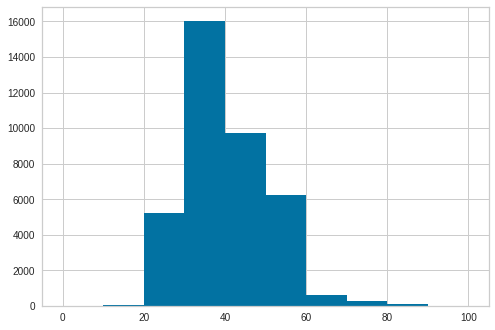

In [ ]:
data_raw.age.hist(bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
# here we see that the majority of the survey population is between 30 and 40 years old

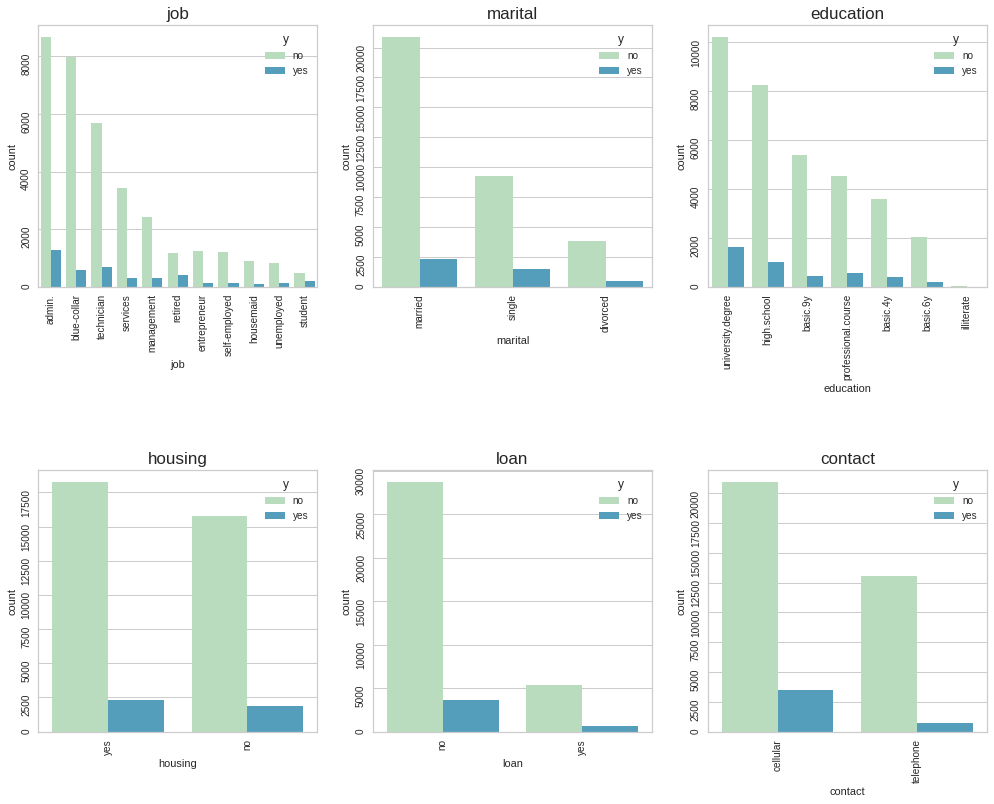

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(17,13))  ##### note to self, still nut sure what value this brings
cat = data_raw.iloc[: , 0:8].select_dtypes('object').columns.to_list()
cat = cat[:-1]
ax = ax.ravel()
position = 0
for i in cat:
    
    order = data_raw.iloc[: , 0:8][i].value_counts().index
    sns.countplot(data=data_raw, x=i, ax=ax[position], hue='y', palette='GnBu', order=order)
    ax[position].tick_params(labelrotation=90)
    ax[position].set_title(i, fontdict={'fontsize':17})
    
    position += 1

plt.subplots_adjust(hspace=0.7)

plt.show()

In [ ]:
# since default gives us little to no information, we decide to drop this column ### note to self, already dropped this before, where should it be dropped?
# data.drop('default', inplace=True, axis=1)

In [ ]:
# We decided to bin together age in theese 4 groups as we deiced that it makes sense as to which stage of their life they are in, is considered similar. 
# By doing this we convert the age feature to an ordinal data type. 
def age(data):
    data.loc[data['age'] <= 30, 'age'] = 1
    data.loc[(data['age'] > 30) & (data['age'] <= 45), 'age'] = 2
    data.loc[(data['age'] > 45) & (data['age'] <= 65), 'age'] = 3
    data.loc[(data['age'] > 65) & (data['age'] <= 98), 'age'] = 4
           
    return data

age(data);

###### Converting binary and ordinal features into numeric values.

In [ ]:
#Converting binary variables in bank client data into numeric values using Labelencoder
#Futher more we do this for the categorial data with a natural order, like education, since having a university degree is considered of a higher value than having high school diploma
#We do this due to the fact that SML is better at handeling numeric values rather than strings
labelencoder_X = LabelEncoder()  
# data['education']= labelencoder_X.fit_transform(data['education']) 
data['housing']  = labelencoder_X.fit_transform(data['housing']) 
data['loan']     = labelencoder_X.fit_transform(data['loan']) 
# to make sure education has the right order, we have to make sure in comes the right order. We will set the "least" valueable education level to zero and the highest education level to the higest value
# there are seven options and the order is obvious, except for the illiterate, who will be set as the least valueable education level, as it is defined as a handicap that might render an individual unable to join the workforce
# the order will be: "illiterate" "basic.4y","basic.6y","basic.9y","high.school","professional.course","university.degree"
# Labelencoder sorts the values alphabetically, so we have to make sure that the illiterate value is beeing set to 0.

In [ ]:
# setting the name to a_illiterate to make sure Labelencoder sorts as to the above criteria
data['education'] = data['education'].replace({'illiterate':'a_illiterate'})

In [ ]:
# now we Labelencode the variable education
data['education'] = labelencoder_X.fit_transform(data['education']) 

###### Now we use onehot encoder to create dummies on the variables which doesent have some kind of inherent order.

In [ ]:
y = data.y ### note to self, why is this here?
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

## Related with the last contact of the current campaign & Other attributes
- variable number 8-15 as in the .txt file
- variables included in this section
###### 8. contact 9. month 10. dayofweek 11. duration 12. campaign 13. pdays 14. previous 15. poutcome

As according to the article the duration variable is first known after the call has ended. Therefore we drop it, because we can't use it in our model.

It is worth noting that the pdays feature is a numeric variable 

Definition as according to the .text file; 
  
  "number of days that passed by after the client was last contacted from a   previous campaign" (numeric; 999 means client was not previously contacted)

The 999 value of pdays, will give a scaling problem and we will deal with this in this subsection

In [ ]:
#Since duration first will be known after the call has been completed, we cant use this feature in our model
data.drop("duration",inplace=True,axis=1)

In [ ]:
#We are now looking at the featuregroups 'Related with the last contact of the current campaign' and 'Other attributes'
data.iloc[: , 6:13]

,contact,month,day_of_week,campaign,pdays,previous,poutcome
18413,cellular,jul,thu,1,999,0,nonexistent
11910,telephone,jun,fri,3,999,0,nonexistent
16117,cellular,jul,tue,1,999,0,nonexistent
20147,cellular,aug,mon,1,999,0,nonexistent
33579,cellular,may,tue,3,999,0,nonexistent
...,...,...,...,...,...,...,...
41174,cellular,nov,thu,1,1,6,success
41178,cellular,nov,thu,2,6,3,success
41181,cellular,nov,fri,1,999,0,nonexistent
41183,cellular,nov,fri,1,999,0,nonexistent


In [ ]:
data.iloc[: , 6:13].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8516 entries, 18413 to 41186
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   contact      8516 non-null   object
 1   month        8516 non-null   object
 2   day_of_week  8516 non-null   object
 3   campaign     8516 non-null   int64 
 4   pdays        8516 non-null   int64 
 5   previous     8516 non-null   int64 
 6   poutcome     8516 non-null   object
dtypes: int64(3), object(4)
memory usage: 532.2+ KB


In [ ]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
18413,2,admin.,married,6,0,0,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
11910,2,blue-collar,single,1,0,0,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
16117,2,blue-collar,married,1,1,0,cellular,jul,tue,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
20147,1,admin.,single,6,1,0,cellular,aug,mon,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
33579,2,management,married,3,1,0,cellular,may,tue,3,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,no


In [ ]:
# Printing the values of the categorial data to get a better overview
print('Unique values for contact:\n', data.contact.unique())
print('')
print('Unique values for month:\n', data.month.unique())
print('')
print('Unique values for day of week:\n', data.day_of_week.unique())
print('')
print('Unique values for day of poutcome:\n', data.poutcome.unique())
print('')

Unique values for contact:
 ['cellular' 'telephone']

Unique values for month:
 ['jul' 'jun' 'aug' 'may' 'nov' 'apr' 'mar' 'oct' 'dec' 'sep']

Unique values for day of week:
 ['thu' 'fri' 'tue' 'mon' 'wed']

Unique values for day of poutcome:
 ['nonexistent' 'failure' 'success']



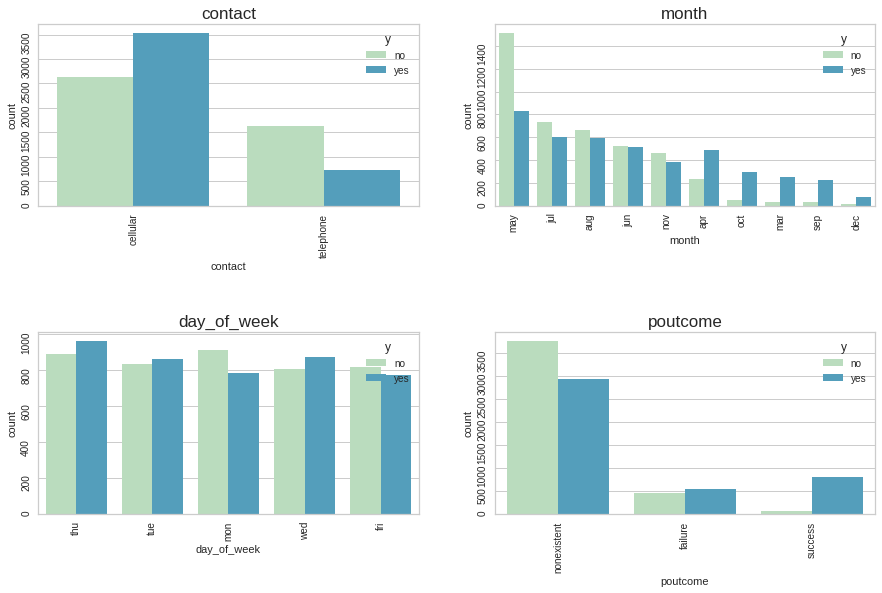

In [ ]:
#Visualising our data to get an insight in the features with dtype=object ### note to self, unsure what this brings of value
fig, ax = plt.subplots(2,2, figsize=(15,9))
cat = data.filter(items=['contact','month','day_of_week','poutcome'])
cat = cat[:-1]
ax = ax.ravel()
position = 0
for i in cat:
    
    order = data.filter(items=['contact','month','day_of_week','poutcome'])[i].value_counts().index
    sns.countplot(data=data, x=i, ax=ax[position], hue='y', palette='GnBu', order=order)
    ax[position].tick_params(labelrotation=90)
    ax[position].set_title(i, fontdict={'fontsize':17})
    
    position += 1

plt.subplots_adjust(hspace=0.7)

plt.show()

In [ ]:
# Encoding binary decision variables into numeric values
# After inspecting the data there is only the feature "contact" that has a binary outcome
# further more theres is no ordinal data in this sub section
data['contact']      = labelencoder_X.fit_transform(data['contact']) 
print("The values in the column contact: 0 = Celluar, 1 = Telephone ")
#NOTE TO SELF: Lidt forkert brug af print?




The values in the column contact: 0 = Celluar, 1 = Telephone 


In [ ]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
18413,2,admin.,married,6,0,0,0,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
11910,2,blue-collar,single,1,0,0,1,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
16117,2,blue-collar,married,1,1,0,0,jul,tue,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
20147,1,admin.,single,6,1,0,0,aug,mon,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
33579,2,management,married,3,1,0,0,may,tue,3,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,no


###### Onehot encoding our nominal data features

In [ ]:
ohe_X = OneHotEncoder(sparse=False)

In [ ]:
#OneHotEncoding our nominal categorical features
X_ohe = ohe_X.fit_transform(data.filter(items=['job','marital','month','day_of_week','poutcome']))

In [ ]:
# Converting the X_ohe from numpy array to dataframe and keeping the column names
X_ohe =pd.DataFrame(X_ohe, columns =list(itertools.chain(*ohe_X.categories_)))

In [ ]:
# note to self, måske lige kigge på pdays count? og på den måde redegøre for hvorfor vi laver den til en binær variabel

In [ ]:
#We deal with the 999 numeric value in the feature pdays
def pdays(data):
    data.loc[data['pdays'] == 999, 'pdays'] = 0
    data.loc[data['pdays'] < 999, 'pdays'] = 1
           
    return data

pdays(data);

## Social and economic context attributes

- This group consist of only numeric values so all theese variables will be standardscaled

In [ ]:
data.iloc[: , 13:18]

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
18413,1.4,93.918,-42.7,4.968,5228.1
11910,1.4,94.465,-41.8,4.959,5228.1
16117,1.4,93.918,-42.7,4.961,5228.1
20147,1.4,93.444,-36.1,4.965,5228.1
33579,-1.8,92.893,-46.2,1.291,5099.1
...,...,...,...,...,...
41174,-1.1,94.767,-50.8,1.031,4963.6
41178,-1.1,94.767,-50.8,1.031,4963.6
41181,-1.1,94.767,-50.8,1.028,4963.6
41183,-1.1,94.767,-50.8,1.028,4963.6


In [ ]:
data.iloc[:, 13:18].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8516 entries, 18413 to 41186
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   emp.var.rate    8516 non-null   float64
 1   cons.price.idx  8516 non-null   float64
 2   cons.conf.idx   8516 non-null   float64
 3   euribor3m       8516 non-null   float64
 4   nr.employed     8516 non-null   float64
dtypes: float64(5)
memory usage: 657.2 KB


In [ ]:
data.iloc[:, 13:18].describe()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,8516.000000,8516.000000,8516.000000,8516.000000,8516.000000
mean,-0.494951,93.469648,-40.285698,2.966633,5136.157022
std,1.713909,0.631990,5.371868,1.883318,86.380759
min,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,-1.800000,92.893000,-42.700000,1.250000,5076.200000
50%,-0.100000,93.444000,-41.800000,4.021000,5191.000000
75%,1.400000,93.994000,-36.400000,4.959000,5228.100000
max,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
#Using StandardScaler on ordinal features
scaler = StandardScaler()

In [ ]:
#Using StandardScaler on ordinal features
data_numeric = data.filter(items=['age','education','campaign','previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']) 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_numeric)

In [ ]:
X_scaled = pd.DataFrame(X_scaled3, columns=['age','education','campaign','previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'])

# Supervised Machine Learning
### we will be trying out 3 different models
- Logistic Regression
- XGboost
- RandomForest

In [ ]:
#Using the concatenate function to append our ordinal (StandardScaled) data with our nominal (OneHotEncoded)
X = pd.concat([X_ohe, X_scaled], axis=1)

### Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
model_lr = LogisticRegression()

In [ ]:
# Fitting to train data
model_lr.fit(X_train, y_train)  ### Iterations reached limit ?????

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [ ]:
#Printing the model score for our LogisicRegression to see how well our model performs
print('Model Logistic Regression train score:' + ' ' + str(model_lr.score(X_train, y_train)))
print('Model Logistic Regression test score :' + ' ' + str(model_lr.score(X_test, y_test))) ## Note to self, what is it exactly this is showing im not to sure

Model Logistic Regression train score: 0.7364944216089254
Model Logistic Regression test score : 0.732981220657277


Upon running this entire notebook 5 times, the model score of logistic regression deviates from 0,7112 to 0,7500

We therefore conclude than the random components in the model are acceptable since the deviation is less than 0,05

In [ ]:
#Using LabelEncoder's inverse transformation to get initial labels of the variables
true_yes_no = labelencoder_y.inverse_transform(y_train)

predicted_yes_no_lr = labelencoder_y.inverse_transform(model_lr.predict(X_train))


In [ ]:
c_matrix_lr = pd.DataFrame({'true_yes_no': true_yes_no, 'predicted_yes_no': predicted_yes_no_lr}) 

pd.crosstab(c_matrix_lr.true_yes_no, c_matrix_lr.predicted_yes_no)

predicted_yes_no,no,yes
true_yes_no,,
no,2880,495
yes,1300,2137


In [ ]:
# Classification report on train data.
print(classification_report(true_yes_no,predicted_yes_no_lr, labels=labelencoder_y.classes_)) 
#NOTE TO SELF:
#Precision =    TP   /    (TP+FP)    => 2373/(2373+531)
#Recall    =    TP   /    (TP+FN)    =>
#F1-score  =  (2TP)  /  (2TP+FP+FN)  =>
#Accuracy  = (TP+TN) / (TP+TN+FP+FN) =>


              precision    recall  f1-score   support

          no       0.69      0.85      0.76      3375
         yes       0.81      0.62      0.70      3437

    accuracy                           0.74      6812
   macro avg       0.75      0.74      0.73      6812
weighted avg       0.75      0.74      0.73      6812



In [ ]:
#Using LabelEncoder's inverse transformation to get initial labels of the variables on test data
true_yes_no_test = labelencoder_y.inverse_transform(y_test)
predicted_yes_no_lr_test = labelencoder_y.inverse_transform(model_lr.predict(X_test))

In [ ]:
c_matrix_lr_test = pd.DataFrame({'true_yes_no': true_yes_no_test, 'predicted_yes_no': predicted_yes_no_lr_test}) 

pd.crosstab(c_matrix_lr_test.true_yes_no, c_matrix_lr_test.predicted_yes_no)

predicted_yes_no,no,yes
true_yes_no,,
no,750,133
yes,322,499


In [ ]:
# Classification report on test data
print(classification_report(true_yes_no_test,predicted_yes_no_lr_test, labels=labelencoder_y.classes_))

              precision    recall  f1-score   support

          no       0.70      0.85      0.77       883
         yes       0.79      0.61      0.69       821

    accuracy                           0.73      1704
   macro avg       0.74      0.73      0.73      1704
weighted avg       0.74      0.73      0.73      1704



X does not have valid feature names, but LogisticRegression was fitted with feature names
detected multi-dimensional feature importances but stack=False, using mean to aggregate them.


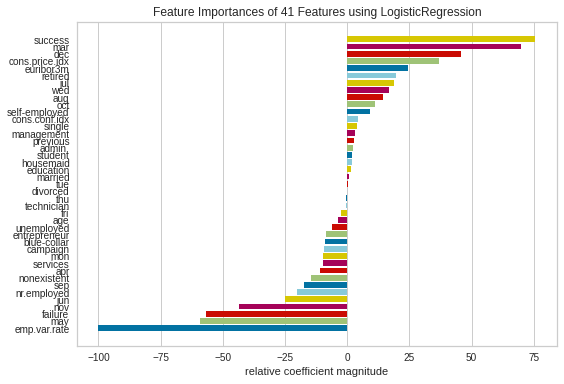

In [ ]:
# Feature importance
from yellowbrick.features import FeatureImportances

viz = FeatureImportances(model_lr)
viz.fit(X, y)
viz.show()

## XGBClassifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_xgb = XGBClassifier()

In [ ]:
# Fitting to train data
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
# y_pred_train = model_xgb.predict(X_train) note to self not to sure what this does

In [ ]:
print('Model XGB train score:' + ' ' + str(model_xgb.score(X_train, y_train)))
print('Model XGB test score :' + ' ' + str(model_xgb.score(X_test, y_test)))

Model XGB train score: 0.82809747504404
Model XGB test score : 0.721830985915493


In [ ]:
# Reversing labels
predicted_yes_no_xgb = labelencoder_y.inverse_transform(model_xgb.predict(X_train))

In [ ]:
# Constructing confusion matrix for XGB model on train data
c_matrix_xgb = pd.DataFrame({'true_yes_no': true_yes_no, 'predicted_yes_no': predicted_yes_no_xgb}) 

pd.crosstab(c_matrix_xgb.true_yes_no, c_matrix_xgb.predicted_yes_no)

predicted_yes_no,no,yes
true_yes_no,,
no,3076,299
yes,872,2565


In [ ]:
# Classification report to get an overview of performance (train data)
print(classification_report(true_yes_no,predicted_yes_no_xgb, labels=labelencoder_y.classes_))

              precision    recall  f1-score   support

          no       0.78      0.91      0.84      3375
         yes       0.90      0.75      0.81      3437

    accuracy                           0.83      6812
   macro avg       0.84      0.83      0.83      6812
weighted avg       0.84      0.83      0.83      6812



In [ ]:
predicted_yes_no_xgb_test = labelencoder_y.inverse_transform(model_xgb.predict(X_test))

In [ ]:
# Constructing confusion matrix for XGB model on test data
c_matrix_xgb_test = pd.DataFrame({'true_yes_no': true_yes_no_test, 'predicted_yes_no': predicted_yes_no_xgb_test}) 

pd.crosstab(c_matrix_xgb_test.true_yes_no, c_matrix_xgb_test.predicted_yes_no)

predicted_yes_no,no,yes
true_yes_no,,
no,700,183
yes,291,530


In [ ]:
# Classification report to get an overview of performance (test data)
print(classification_report(true_yes_no_test,predicted_yes_no_xgb_test, labels=labelencoder_y.classes_))

              precision    recall  f1-score   support

          no       0.71      0.79      0.75       883
         yes       0.74      0.65      0.69       821

    accuracy                           0.72      1704
   macro avg       0.72      0.72      0.72      1704
weighted avg       0.72      0.72      0.72      1704



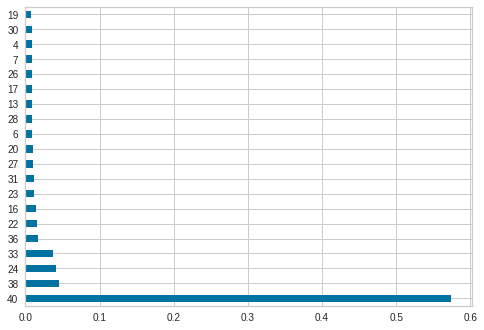

In [ ]:
feat_importances = pd.Series(model_xgb.feature_importances_)
feat_importances.nlargest(20).plot(kind='barh')

## RandomForest

In [ ]:
model_rf = RandomForestClassifier()

In [ ]:
# Fitting model
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Checking score
print('Model Random Forest train score:' + ' ' + str(model_rf.score(X_train, y_train)))
print('Model Random Forest test score :' + ' ' + str(model_rf.score(X_test, y_test)))

Model Random Forest train score: 0.9684380504991192
Model Random Forest test score : 0.693075117370892


In [ ]:
# Recalling original labels
predicted_yes_no_rf = labelencoder_y.inverse_transform(model_rf.predict(X_train))

In [ ]:

c_matrix_rf = pd.DataFrame({'true_yes_no': true_yes_no, 'predicted_yes_no': predicted_yes_no_rf}) 

pd.crosstab(c_matrix_rf.true_yes_no, c_matrix_rf.predicted_yes_no)

predicted_yes_no,no,yes
true_yes_no,,
no,3276,99
yes,116,3321


In [ ]:
print(classification_report(true_yes_no,predicted_yes_no_rf, labels=labelencoder_y.classes_))

              precision    recall  f1-score   support

          no       0.97      0.97      0.97      3375
         yes       0.97      0.97      0.97      3437

    accuracy                           0.97      6812
   macro avg       0.97      0.97      0.97      6812
weighted avg       0.97      0.97      0.97      6812



In [ ]:
predicted_yes_no_rf_test = labelencoder_y.inverse_transform(model_rf.predict(X_test))

In [ ]:
c_matrix_rf_test = pd.DataFrame({'true_yes_no': true_yes_no_test, 'predicted_yes_no': predicted_yes_no_rf_test}) 

pd.crosstab(c_matrix_rf_test.true_yes_no, c_matrix_rf_test.predicted_yes_no)

predicted_yes_no,no,yes
true_yes_no,,
no,651,232
yes,291,530


In [ ]:
print(classification_report(true_yes_no_test,predicted_yes_no_rf_test, labels=labelencoder_y.classes_))

              precision    recall  f1-score   support

          no       0.69      0.74      0.71       883
         yes       0.70      0.65      0.67       821

    accuracy                           0.69      1704
   macro avg       0.69      0.69      0.69      1704
weighted avg       0.69      0.69      0.69      1704



In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(model_xgb)

In [ ]:
shap_values = explainer.shap_values(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


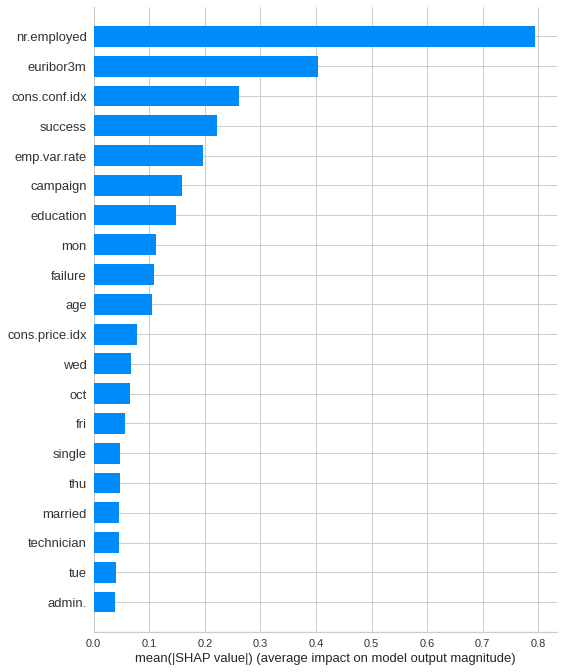

In [ ]:
shap.summary_plot(shap_values, X, plot_type="bar")

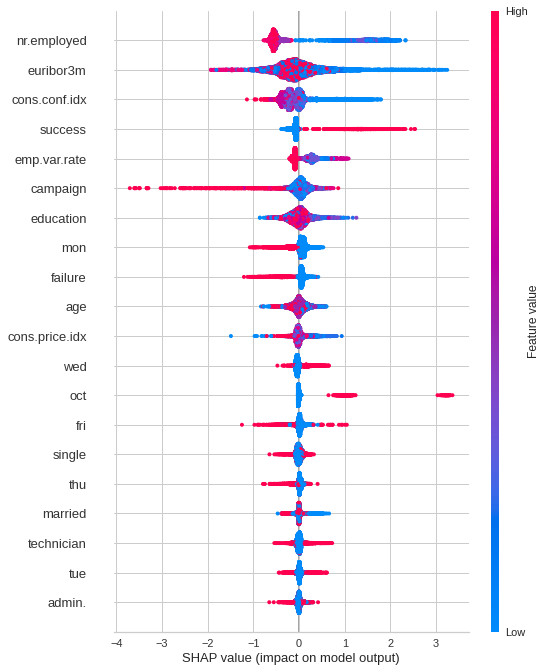

In [ ]:
shap.summary_plot(shap_values, X)

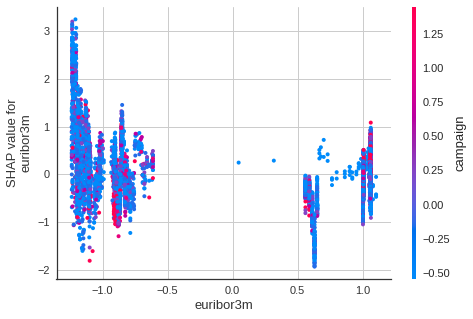

In [ ]:
shap.dependence_plot("euribor3m", shap_values, X)

# Exporting our models

In [ ]:
import pickle

In [ ]:
model_xgb.save_model('model_xgb.json')

In [ ]:
pickle.dump(scaler, open('scaler.pkl','wb'))

In [ ]:
pickle.dump(ohe_X, open('ohe.pkl','wb'))

In [ ]:
X.to_json('X.json')
data.to_json('data.json')

In [ ]:
pickle.dump(model_xgb, open('model_xgb.pkl','wb'))

In [ ]:
pickle.dump(shap_values, open('shap_values.pkl','wb'))

# Model 2

In [ ]:
#Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

#For SML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import itertools
from sklearn.metrics import classification_report

In [ ]:
import umap

In [ ]:
# we could specify more than 2 dimensions (as well as some other parameters)
umap_scaler = umap.UMAP()

In [ ]:
X.head(1)

,age,education,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,...,failure,nonexistent,success,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.162802,1.046867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.54697,-0.448683,1.105696,0.709471,-0.449461,1.062744,1.064454


In [ ]:
X2 = X.iloc[:,0:2]

In [ ]:
data['job'].value_counts()

admin.           2378
blue-collar      1574
technician       1416
services          725
management        600
retired           536
entrepreneur      284
self-employed     281
student           275
unemployed        241
housemaid         206
Name: job, dtype: int64

In [ ]:
#answer = labelencoder_y.fit_transform(data['y']) 
#job = labelencoder_y.fit_transform(data['job']) 
job = data['job']
job_scale = job.replace(to_replace=['unemployed', 'student', 'housemaid', 'blue-collar', 'services', 'retired', 'technician', 'admin.', 'self-employed', 'entrepreneur', 'management'], value=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [ ]:
#answer = pd.DataFrame(answer, columns = ['y'])
job_scale = pd.DataFrame(job_scale, columns = ['job'])

In [ ]:
job_scaled = scaler.fit_transform(job_scale)

In [ ]:
job_scaled = pd.DataFrame(job_scaled, columns = ['job'])

In [ ]:
type(job_scaled)

pandas.core.frame.DataFrame

In [ ]:
X2['job'] = job_scaled


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
X2

,age,education,job
0,-0.162802,1.046867,0.613893
1,-0.162802,-2.001454,-1.035682
2,-0.162802,-2.001454,-1.035682
3,-1.463381,1.046867,0.613893
4,-0.162802,-0.782125,1.851075
...,...,...,...
8511,1.137778,1.046867,-0.210894
8512,1.137778,1.046867,-0.210894
8513,-0.162802,1.046867,0.613893
8514,2.438358,0.437203,-0.210894


In [ ]:
# umap accepts standard-scaled data
embeddings = umap_scaler.fit_transform(X2)

In [ ]:
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=4)

In [ ]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X2)
    Sum_of_squared_distances.append(km.inertia_)

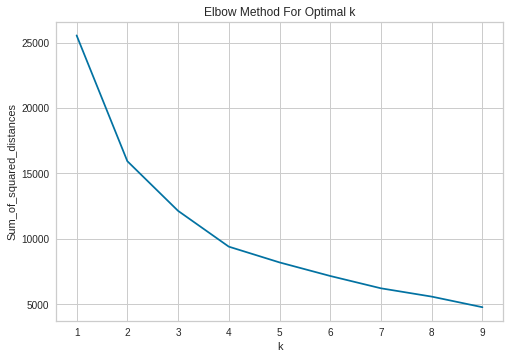

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

clustering can and sometimes is used together with dimensionality reduction.
In the end, it's about how much the used combination of approaches create representations of the data that are useful for the analysis.

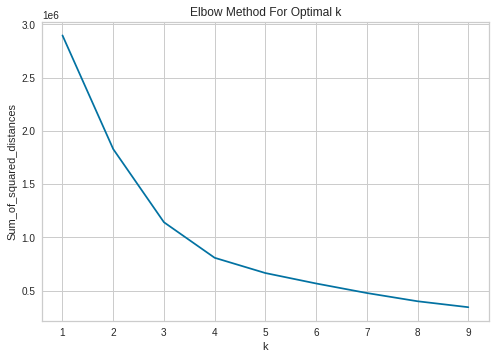

In [ ]:
umap_scaler_km = umap.UMAP(n_components=3)
embeddings_km = umap_scaler.fit_transform(X2)


Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(embeddings_km)
    Sum_of_squared_distances.append(km.inertia_)


plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
# back to our k-means instance. We take 3 clusters on non-reduced data
clusterer.fit(X2)

KMeans(n_clusters=4)

In [ ]:
# we can then copy the cluster-numbers into the original file and start exploring
X2['cluster'] = clusterer.labels_


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# e.g. which cluster seems most lgbt-friendly 🌈
X2.groupby('cluster').education.mean()

cluster
0    0.487291
1    0.593825
2   -0.428486
3   -1.666088
Name: education, dtype: float64

In [ ]:
X2.head().T

,0,1,2,3,4
age,-0.162802,-0.162802,-0.162802,-1.463381,-0.162802
education,1.046867,-2.001454,-2.001454,1.046867,-0.782125
job,0.613893,-1.035682,-1.035682,0.613893,1.851075
cluster,1.000000,3.000000,3.000000,1.000000,1.000000


In [ ]:
vis_data = pd.DataFrame(embeddings)
vis_data['cluster'] = X2['cluster']
vis_data['education'] = X2['education']
vis_data['age'] = X2['age']
vis_data['job'] = X2['job']
vis_data.columns = ['x', 'y', 'cluster','education', 'age', 'job']

In [ ]:
X2.head()

,age,education,job,cluster
0,-0.162802,1.046867,0.613893,1
1,-0.162802,-2.001454,-1.035682,3
2,-0.162802,-2.001454,-1.035682,3
3,-1.463381,1.046867,0.613893,1
4,-0.162802,-0.782125,1.851075,1


In [ ]:
alt.data_transformers.enable('default', max_rows=10000)
alt.Chart(vis_data).mark_circle(size=60).encode(
    x='x',
    y='y',
    tooltip=['education', 'age', 'job'],
    color=alt.Color('cluster:N', scale=alt.Scale(scheme='dark2')) #use N after the var to tell altair that it's categorical
).interactive()

alt.Chart(...)

In [ ]:
X2.head()

,age,education,job,cluster
0,-0.162802,1.046867,0.613893,1
1,-0.162802,-2.001454,-1.035682,3
2,-0.162802,-2.001454,-1.035682,3
3,-1.463381,1.046867,0.613893,1
4,-0.162802,-0.782125,1.851075,1


In [ ]:
data.education.value_counts()

6    2920
4    2022
5    1165
3    1105
1     871
2     427
0       6
Name: education, dtype: int64